### Objetivos:
1 - Entender se o perfil dos clientes que cancelam hoje é diferente do peril dos clientes que cancelaram anteriormente. 
* Dica: Fazer um comparativo dos clientes que cancelaram nos últimos 6 meses com os que cancelaram a mais de 24 meses.

2 - Entender quais são as principais diferenças entre os perfis, para que possam criar estratégias mais eficazes de retenção. 
Para isso, eles fornecem a base de dados clientes.csv, que contém informações anonimizadas sobre os clientes ao longo do tempo.

Passo 1 - Instalação das biblioteca, leitura da base e exploração inicial

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("clientes.csv")

ModuleNotFoundError: No module named 'matplotlib'

exibir informações gerais sobre os dados

In [4]:
print("Informações gerais: ")
print(df.head())

Informações gerais: 
   cliente_id  idade  tempo_assinatura_meses  frequencia_uso_mensal  \
0           1     56                      30                     27   
1           2     69                      11                      2   
2           3     46                      58                     21   
3           4     32                      55                      1   
4           5     60                      28                     28   

         regiao  mensalidade  cancelou  
0  Centro-Oeste        96.03         1  
1         Norte        91.22         0  
2           Sul        56.45         0  
3         Norte        69.61         0  
4           Sul        42.19         0  


# exibir resumo estatístico das colunas numéricas

In [5]:
print("\nResumo estatístico: ")
print(df.describe())


Resumo estatístico: 
       cliente_id       idade  tempo_assinatura_meses  frequencia_uso_mensal  \
count  200.000000  200.000000              200.000000             200.000000   
mean   100.500000   45.260000               30.890000              15.980000   
std     57.879185   16.040852               17.679102               8.843679   
min      1.000000   18.000000                1.000000               1.000000   
25%     50.750000   31.750000               16.750000               8.000000   
50%    100.500000   45.000000               32.000000              17.000000   
75%    150.250000   59.000000               48.000000              23.000000   
max    200.000000   74.000000               59.000000              29.000000   

       mensalidade    cancelou  
count   200.000000  200.000000  
mean     59.129000    0.280000  
std      23.318007    0.450126  
min      21.160000    0.000000  
25%      38.807500    0.000000  
50%      57.710000    0.000000  
75%      79.680000    1.00

# verificar valores nulos

In [6]:
print("\nValores nulos por coluna: ")
print(df.isnull().sum())


Valores nulos por coluna: 
cliente_id                0
idade                     0
tempo_assinatura_meses    0
frequencia_uso_mensal     0
regiao                    0
mensalidade               0
cancelou                  0
dtype: int64


Passo 1 - Análise das distribuições
Comparando:

Passo 1 - Análise das distribuições
Comparando:

Idade, Tempo de assinatura, Frequência de uso, Região
Entre dois grupos:
- Clientes que cancelaram há mais de 24 meses
- Clientes que cancelaram nos últimos 6 meses

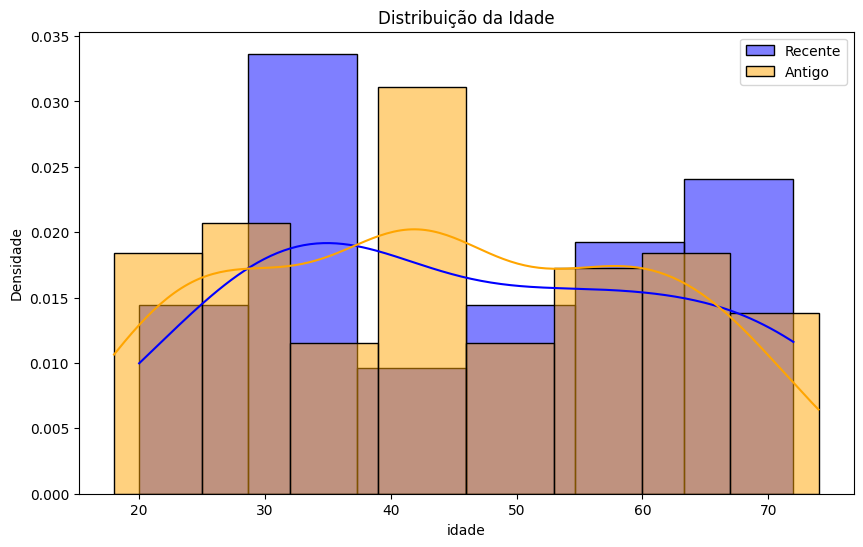

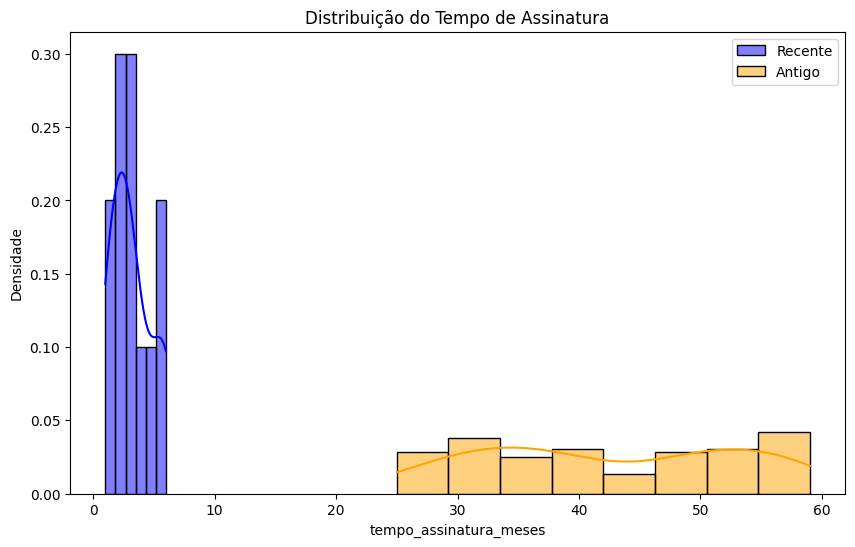

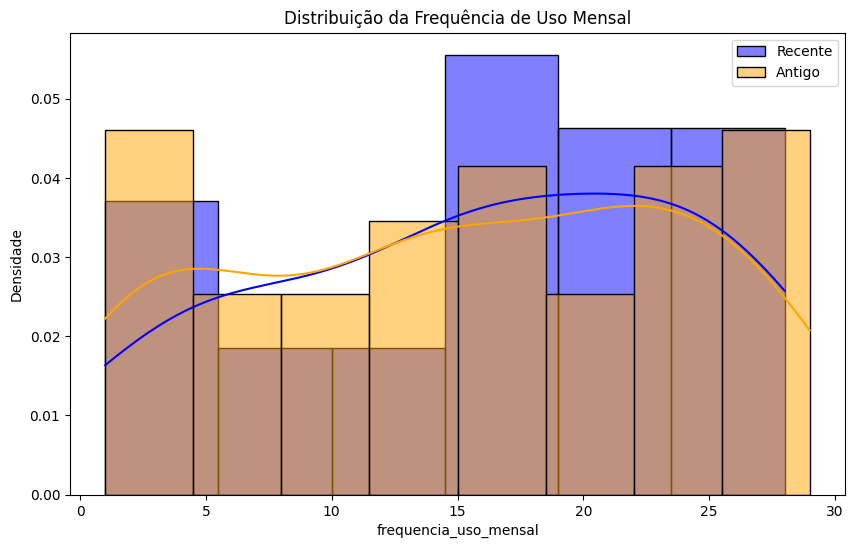

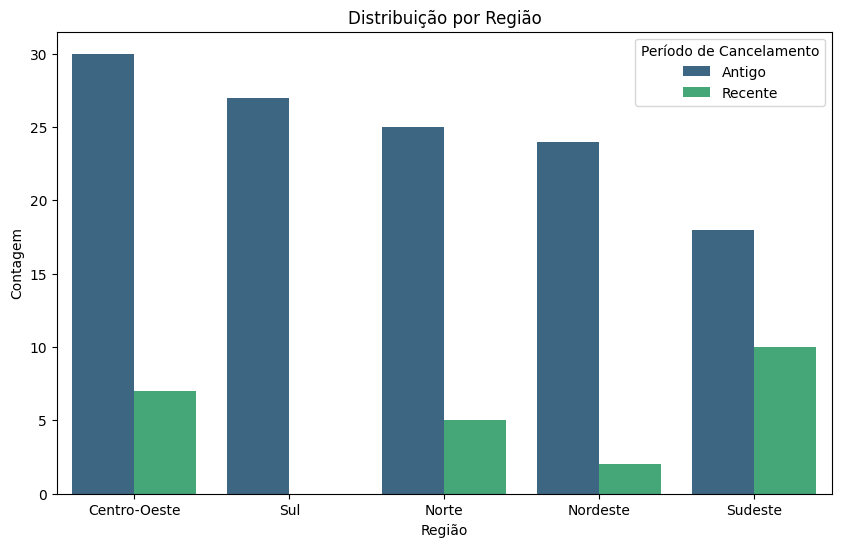

In [7]:
# Adicionar coluna categórica para período de cancelamento
df['cancelamento_periodo'] = df['tempo_assinatura_meses'].apply(
    lambda x: 'Recente' if x <= 6 else 'Antigo' if x > 24 else 'Outro'
)

# Filtrar os grupos de interesse
df_recente = df[df['cancelamento_periodo'] == 'Recente']
df_antigo = df[df['cancelamento_periodo'] == 'Antigo']

# Função para gerar gráficos de comparação
def comparar_distribuicoes(coluna, titulo):
    plt.figure(figsize=(10, 6))
    sns.histplot(df_recente[coluna], color='blue', label='Recente', kde=True, stat="density")
    sns.histplot(df_antigo[coluna], color='orange', label='Antigo', kde=True, stat="density")
    plt.title(titulo)
    plt.xlabel(coluna)
    plt.ylabel('Densidade')
    plt.legend()
    plt.show()

# Comparação das distribuições para idade
comparar_distribuicoes('idade', 'Distribuição da Idade')

# Comparação das distribuições para tempo de assinatura
comparar_distribuicoes('tempo_assinatura_meses', 'Distribuição do Tempo de Assinatura')

# Comparação das distribuições para frequência de uso
comparar_distribuicoes('frequencia_uso_mensal', 'Distribuição da Frequência de Uso Mensal')

# Comparação por região
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['cancelamento_periodo'].isin(['Recente', 'Antigo'])],
              x='regiao', hue='cancelamento_periodo', palette='viridis')
plt.title('Distribuição por Região')
plt.xlabel('Região')
plt.ylabel('Contagem')
plt.legend(title='Período de Cancelamento')
plt.show()

Passo 2 - Visualizações para identificar padrões nos clientes:

- Que mantêm a assinatura
- Que cancelaram

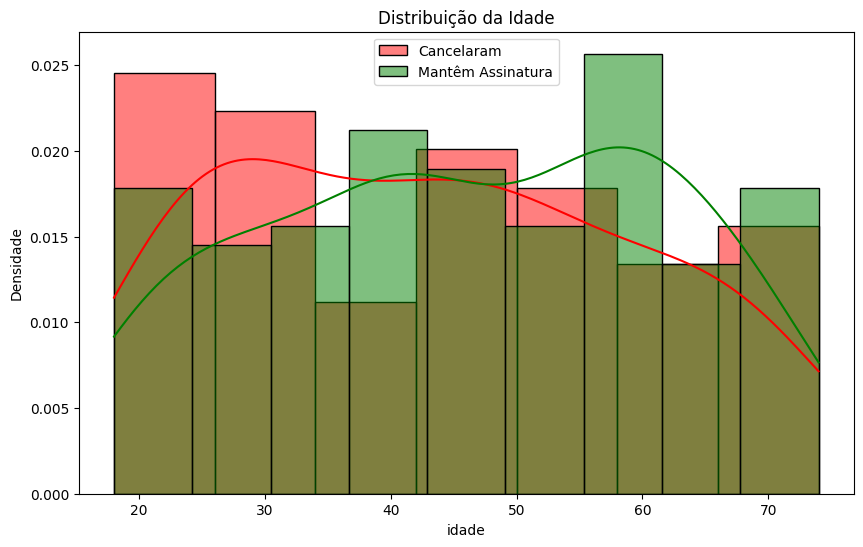

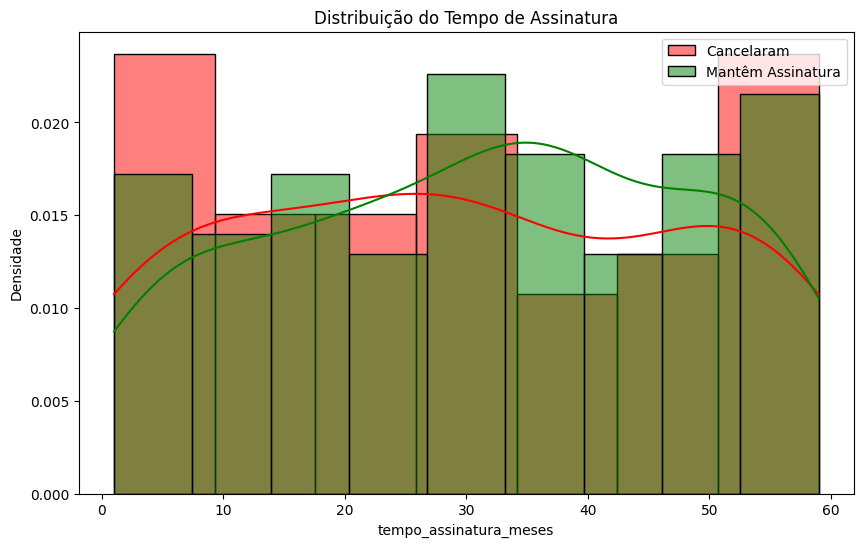

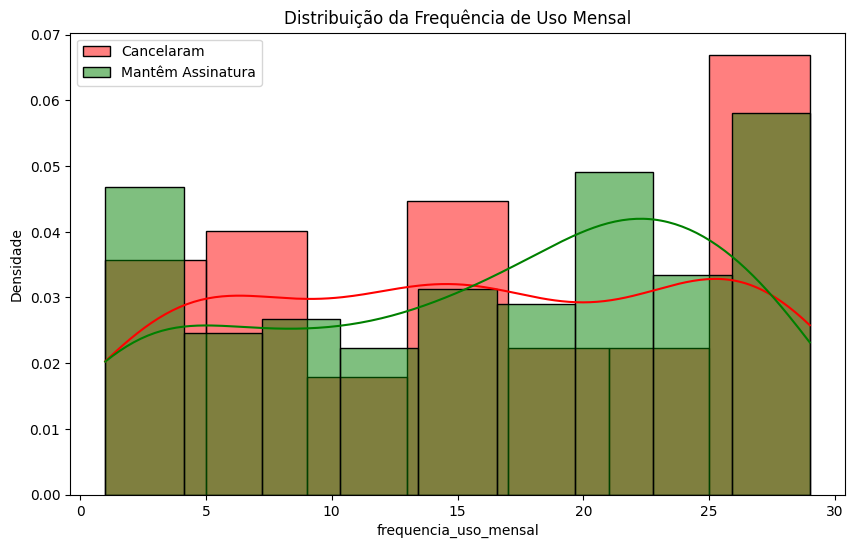

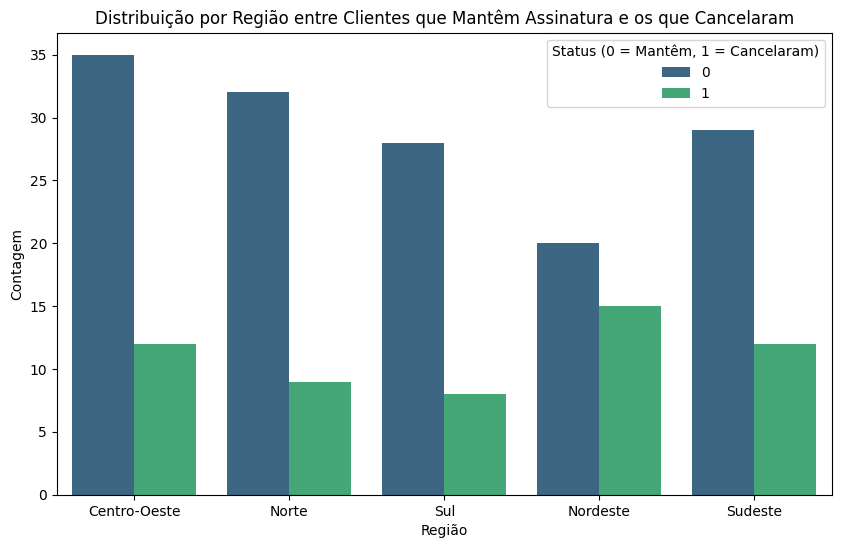

In [8]:
# Criar dois grupos: clientes que cancelaram e clientes que mantêm a assinatura
clientes_cancelaram = df[df['cancelou'] == 1]
clientes_mantem = df[df['cancelou'] == 0]

# Função para gerar histogramas de comparação
def comparar_padroes(coluna, titulo):
    plt.figure(figsize=(10, 6))
    sns.histplot(clientes_cancelaram[coluna], color='red', label='Cancelaram', kde=True, stat="density")
    sns.histplot(clientes_mantem[coluna], color='green', label='Mantêm Assinatura', kde=True, stat="density")
    plt.title(titulo)
    plt.xlabel(coluna)
    plt.ylabel('Densidade')
    plt.legend()
    plt.show()

# Comparar distribuições por idade
comparar_padroes('idade', 'Distribuição da Idade')

# Comparar distribuições por tempo de assinatura
comparar_padroes('tempo_assinatura_meses', 'Distribuição do Tempo de Assinatura')

# Comparar distribuições por frequência de uso mensal
comparar_padroes('frequencia_uso_mensal', 'Distribuição da Frequência de Uso Mensal')

# Comparar distribuições por região (gráfico de barras)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='regiao', hue='cancelou', palette='viridis')
plt.title('Distribuição por Região entre Clientes que Mantêm Assinatura e os que Cancelaram')
plt.xlabel('Região')
plt.ylabel('Contagem')
plt.legend(title='Status (0 = Mantêm, 1 = Cancelaram)')
plt.show()

Passo 3 - Testes estatísticos

Verificar se há uma relação significativa entre o tempo de assinatura e o cancelamento.

In [1]:
# Importar bibliotecas necessárias
import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr
import statsmodels.api as sm

# Carregar o dataset (caso ainda não esteja carregado)
df = pd.read_csv("clientes.csv")

# 1. Correlação de Pearson
corr_pearson, p_value_pearson = pearsonr(df['tempo_assinatura_meses'], df['cancelou'])
print(f"Correlação de Pearson:")
print(f"  Coeficiente: {corr_pearson:.4f}, p-valor: {p_value_pearson:.4f}")
if p_value_pearson < 0.05:
    print("  Relação significativa entre tempo de assinatura e cancelamento (Pearson).")
else:
    print("  Nenhuma relação significativa entre tempo de assinatura e cancelamento (Pearson).")

# 2. Correlação de Spearman
corr_spearman, p_value_spearman = spearmanr(df['tempo_assinatura_meses'], df['cancelou'])
print(f"\nCorrelação de Spearman:")
print(f"  Coeficiente: {corr_spearman:.4f}, p-valor: {p_value_spearman:.4f}")
if p_value_spearman < 0.05:
    print("  Relação significativa entre tempo de assinatura e cancelamento (Spearman).")
else:
    print("  Nenhuma relação significativa entre tempo de assinatura e cancelamento (Spearman).")

# 3. Regressão Logística
X = sm.add_constant(df['tempo_assinatura_meses'])  # Adicionar uma constante ao modelo
y = df['cancelou']

model = sm.Logit(y, X)  # Ajustar o modelo Logístico
result = model.fit()    # Treinar o modelo

# Exibir o resumo do modelo
print("\nResumo da Regressão Logística:")
print(result.summary())

NameError: name 'pd' is not defined

1. Correlação de Pearson
O coeficiente de correlação de Pearson mede a relação linear entre o tempo de assinatura e o cancelamento.

* Coeficiente de correlação: Este valor indica a força e direção da relação linear. Se o coeficiente foi:
 * Próximo de 1, existe uma forte relação positiva (ou seja, conforme o tempo de assinatura aumenta, o cancelamento tende a aumentar).
 * Próximo de -1, existe uma forte relação negativa (ou seja, conforme o tempo de assinatura aumenta, o cancelamento tende a diminuir).
 * Próximo de 0, não há uma relação linear significativa entre as variáveis.

* Valor-p: Este valor nos informa se a correlação é estatisticamente significativa. Caso seja menor que 0.05, podemos dizer que a relação é significativa, ou seja, é improvável que os resultados sejam aleatórios.

Se a análise indicou um valor de correlação próximo a 0 ou um valor-p maior que 0.05, não há uma relação linear forte entre essas variáveis.

2. Correlação de Spearman
A correlação de Spearman mede a relação monotônica entre as variáveis (se elas crescem ou decrescem juntas, mesmo sem ser linear).

* Assim como na correlação de Pearson, o coeficiente de Spearman e o valor-p têm a mesma interpretação.
* Este método é especialmente útil quando há dados não linearmente relacionados ou com ranks.

Se os resultados forem significativos, significa que há uma associação entre o tempo de assinatura e o cancelamento. Caso contrário, não há evidências de uma relação monotônica relevante.

3. Regressão Logística
A regressão logística nos ajuda a prever a probabilidade de cancelamento com base no tempo de assinatura. Os principais pontos a observar são:

* Coeficientes: Indicam a contribuição de cada variável na probabilidade de cancelamento. Se o coeficiente do tempo de assinatura for positivo, significa que conforme o tempo de assinatura aumenta, a probabilidade de cancelamento também cresce. Se for negativo, o aumento no tempo de assinatura reduz a probabilidade de cancelamento.
* Valor-p dos coeficientes: Confirma se cada variável tem um impacto significativo no modelo. Um valor-p menor que 0.05 indica que a variável é significativa na previsão de cancelamento.
* Intercepto: Representa a probabilidade de cancelamento quando o tempo de assinatura é zero.
* Pseudo-R²: Fornece uma medida da qualidade do modelo. Quanto maior, melhor o modelo explica a relação.

Se os coeficientes do tempo de assinatura forem significativos e o modelo mostrar um bom ajuste, isso sugere que o tempo de assinatura é um fator importante para prever o cancelamento. Caso contrário, o tempo de assinatura pode não ser um determinante relevante.


Passo 4 - População e Amostra

Suponha agora que os dados recebidos são somente uma amostra
da sua população total de clientes. Suponha que a sua "população" de
clientes verdadeira é de 100000. Qual o tamanho da amostra
necessária para chegarmos a conclusões com 95% de confiança e 2%
de margem de erro? A base informada é suficiente? E com uma
margem de erro de 10%?

In [19]:
# Importar a biblioteca necessária
from scipy.stats import norm

# Parâmetros
N = 100000  # Tamanho da população
confianca = 0.95  # Nível de confiança
z = norm.ppf((1 + confianca) / 2)  # Valor Z para 95% de confiança
p = 0.5  # Proporção estimada (máxima variabilidade)

# Margens de erro
margem_erro_1 = 0.02  # Margem de erro de 2%
margem_erro_2 = 0.10  # Margem de erro de 10%

# Função para calcular o tamanho da amostra com população finita
def calcular_tamanho_amostra(N, z, p, E):
    return (N * z**2 * p * (1-p)) / ((N-1) * E**2 + z**2 * p * (1-p))

# Cálculo para 2% de margem de erro
tamanho_amostra_1 = calcular_tamanho_amostra(N, z, p, margem_erro_1)
print(f"Tamanho da amostra necessário (margem de erro 2%): {tamanho_amostra_1:.0f}")

# Cálculo para 10% de margem de erro
tamanho_amostra_2 = calcular_tamanho_amostra(N, z, p, margem_erro_2)
print(f"Tamanho da amostra necessário (margem de erro 10%): {tamanho_amostra_2:.0f}")

Tamanho da amostra necessário (margem de erro 2%): 2345
Tamanho da amostra necessário (margem de erro 10%): 96


Verificação da suficiência da amostra e análise descritiva

In [3]:
# Verificação da suficiência da amostra
tamanho_amostra_atual = len(df)  # Quantidade de registros na base de dados
print(f"Tamanho da amostra atual: {tamanho_amostra_atual}")

# Verificar se a amostra atual é suficiente para as margens de erro de 2% e 10%
if tamanho_amostra_atual >= tamanho_amostra_1:
    print("A amostra atual é suficiente para uma margem de erro de 2%.")
elif tamanho_amostra_atual >= tamanho_amostra_2:
    print("A amostra atual é suficiente para uma margem de erro de 10%, mas não para 2%.")
else:
    print("A amostra atual não é suficiente para nenhuma das margens de erro.")

# Análise descritiva dos dados
print("\nAnálise Descritiva dos Dados:")
print(df.describe())  # Estatísticas descritivas para colunas numéricas

# Contagem por categorias (exemplo: clientes que cancelaram ou não)
print("\nDistribuição de Cancelamento:")
print(df['cancelou'].value_counts())  # Contagem de clientes por status de cancelamento

# Visualização de cancelamento por região
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='regiao', hue='cancelou', palette='viridis')
plt.title('Distribuição de Cancelamento por Região')
plt.xlabel('Região')
plt.ylabel('Contagem')
plt.legend(title='Cancelamento (0 = Não, 1 = Sim)')
plt.show()

Tamanho da amostra atual: 200


NameError: name 'tamanho_amostra_1' is not defined

In [1]:
import sweetviz as sv
import pandas as pd

# Carregar o dataset
df = pd.read_csv("clientes.csv")

# Gerar o relatório com o Sweetviz
relatorio = sv.analyze(df)

# Salvar o relatório em HTML
relatorio.show_html("relatorio_clientes.html")  # Será salvo no diretório atual
print("Relatório gerado e salvo como 'relatorio_clientes.html'")


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\jessi\OneDrive\Documentos\womakers\10.estatistica com python - probabilidade e amostragem\desafio em grupo\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3549, in run_code
  File "C:\Users\jessi\AppData\Local\Temp\ipykernel_51260\1830813057.py", line 1, in <module>
    import sweetviz as sv
ModuleNotFoundError: No module named 'sweetviz'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\jessi\OneDrive\Documentos\womakers\10.estatistica com python - probabilidade e amostragem\desafio em grupo\.venv\Lib\site-packages\pygments\styles\__init__.py", line 45, in get_style_by_name
ModuleNotFoundError: No module named 'pygments.styles.default'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\jessi\OneDrive\Documentos\womakers\10.estatistica com python - probabilidade e amostragem\des